In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

In [2]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
# normalize the data

x_train = x_train / 255.0
y_train = y_train / 255.0


In [8]:
# CNN Architecture

model = tf.keras.models.Sequential([
    # 1 Convolution layer of  this architecture
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',input_shape = (28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # 2 Convolution Layer of this architecture 
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dense(10,activation = 'softmax')
    
])

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [10]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [11]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 99s 52ms/step - loss: 0.0040 - accuracy: 0.0999
Epoch 2/10
1875/1875 [==============================] - 99s 53ms/step - loss: 2.3842e-11 - accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 97s 52ms/step - loss: 2.3842e-11 - accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 112s 60ms/step - loss: 2.3842e-11 - accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 115s 61ms/step - loss: 2.3842e-11 - accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 99s 53ms/step - loss: 2.3842e-11 - accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 97s 52ms/step - loss: 2.1855e-11 - accuracy: 0.1000
Epoch 8/10
1875/1875 [==============================] - 91s 49ms/step - loss: 1.9868e-11 - accuracy: 0.1000
Epoch 9/10
1875/1875 [==============================] - 102s 54ms/step - loss: 1.3908e-11 - accuracy: 0.1000
Epoch 10/10
1875/1875 [======

In [12]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 6s 17ms/step - loss: 13857.3564 - accuracy: 0.1000


[13857.3564453125, 0.10000000149011612]

1/1 [==============================] - 0s 43ms/step


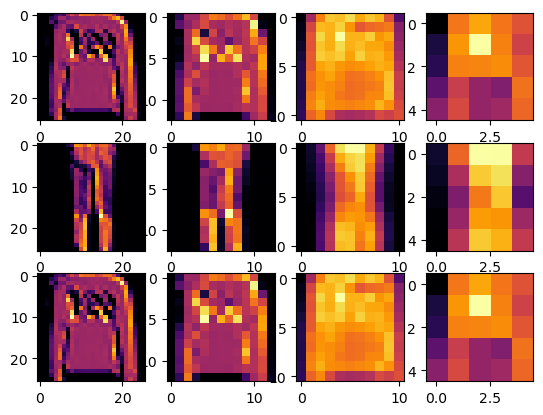

In [29]:
from tensorflow.keras import models

f,axarr = plt.subplots(3,4)
first_image = 1
second_image = 3
third_image = 12
convolution_number = 11
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input,outputs = layer_outputs)

for x in range(0,4):
    f1 = activation_model.predict(x_test[first_image].reshape(1,28,28,1))[x]
    axarr[0,x].imshow(f1[0,:,:,convolution_number],cmap='inferno')
    axarr[0,x].grid(False)
    
    f2 = activation_model.predict(x_test[second_image].reshape(1,28,28,1))[x]
    axarr[1,x].imshow(f2[0,:,:,convolution_number],cmap='inferno')
    axarr[1,x].grid(False)
    
    f3 = activation_model.predict(x_test[first_image].reshape(1,28,28,1))[x]
    axarr[2,x].imshow(f3[0,:,:,convolution_number],cmap='inferno')
    axarr[2,x].grid(False)
    
    

In [32]:
model.predict(x_test)

313/313 [==============================] - 4s 14ms/step


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)